In [2]:
#copied from https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_template.html

import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.feature import match_template
from skimage import color
from skimage import io

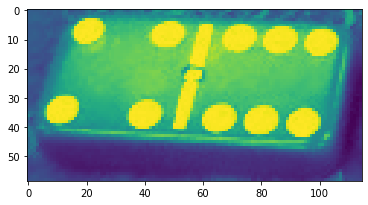

In [3]:
image = color.rgb2gray(io.imread('bottom_a55.jpg'))
domino = image[244:303, 122:237]
plt.imshow(domino)



In [6]:
result = match_template(image, domino, pad_input=True)
ij = np.unravel_index(np.argmax(result), result.shape)
bool_result = result > 0.6
x, y = ij[::-1]

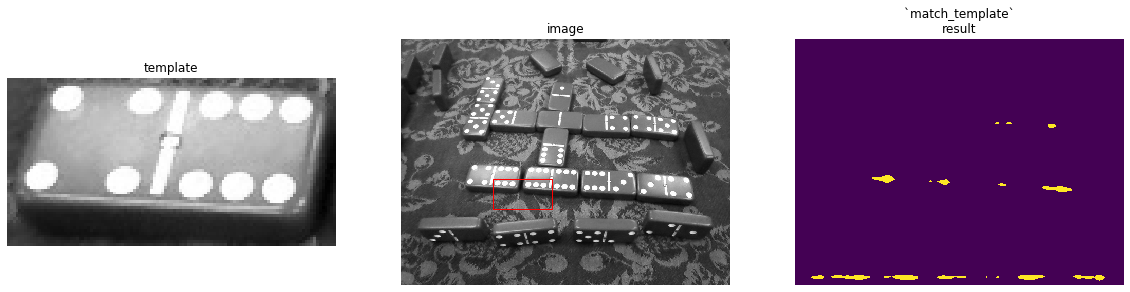

In [51]:
fig = plt.figure(figsize=(20,7))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

ax1.imshow(domino, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(image, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
hdomino, wdomino = domino.shape
rect = plt.Rectangle((x, y), wdomino, hdomino, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(bool_result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
#ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=20)

plt.show()